In [1]:
'''
Author: ChenHJ
Date: 2023-01-13 20:32:13
LastEditors: ChenHJ
LastEditTime: 2023-01-13 20:32:32
FilePath: /0302code/obs_CMIP_sIndR_ENSO_related_plot.ipynb
Aim: 
01/13/2023:
  画图：ENSO_related和ENSO_unrelated的南部降水对应的环流等
Mission: 
'''
from mailbox import _PartialFile
import numpy as np
import xarray as xr
import os
import re
from cdo import *
import shutil
import sys

sys.path.append("/home/ys17-23/chenhj/self_def/")
import plot as sepl
import cal as ca
import pandas as pd
from importlib import reload

import metpy.calc as mpcalc
import metpy.constants as constants
import geocat.comp
from windspharm.xarray import VectorWind
import skill_metrics as sm
from brokenaxes import brokenaxes

reload(sepl)

# sd.path.append("/home/ys17-23/chenhj/1201code/self_def.py")

cdo = Cdo()

# for plot
import proplot as pplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter
from cartopy.mpl.ticker import LatitudeFormatter
from cartopy.util import add_cyclic_point
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy import signal
from eofs.multivariate.standard import MultivariateEof
from eofs.standard import Eof
import statsmodels.api as sm
import dask
from dask.distributed import Client

# 读取数据

## 观测

In [2]:
pre_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/pre_north_south_ENSO_related_unrelated_partial_correlation.nc")
hgt_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/hgt_north_south_ENSO_related_unrelated_partial_correlation.nc")

sstDJF_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstDJF_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstMAM_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstMAM_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstJJA_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstJJA_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstSON_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstSON_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstnDJF_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstnDJF_north_south_ENSO_related_unrelated_partial_correlation.nc")

uDJF_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/uDJF_north_south_ENSO_related_unrelated_partial_correlation.nc")
uMAM_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/uMAM_north_south_ENSO_related_unrelated_partial_correlation.nc")
uJJA_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/uJJA_north_south_ENSO_related_unrelated_partial_correlation.nc")
uSON_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/uSON_north_south_ENSO_related_unrelated_partial_correlation.nc")
unDJF_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/unDJF_north_south_ENSO_related_unrelated_partial_correlation.nc")
vDJF_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vDJF_north_south_ENSO_related_unrelated_partial_correlation.nc")
vMAM_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vMAM_north_south_ENSO_related_unrelated_partial_correlation.nc")
vJJA_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vJJA_north_south_ENSO_related_unrelated_partial_correlation.nc")
vSON_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vSON_north_south_ENSO_related_unrelated_partial_correlation.nc")
vnDJF_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vnDJF_north_south_ENSO_related_unrelated_partial_correlation.nc")

spDJF_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/spDJF_north_south_ENSO_related_unrelated_partial_correlation.nc")
spMAM_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/spMAM_north_south_ENSO_related_unrelated_partial_correlation.nc")
spJJA_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/spJJA_north_south_ENSO_related_unrelated_partial_correlation.nc")
spSON_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/spSON_north_south_ENSO_related_unrelated_partial_correlation.nc")
spnDJF_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/spnDJF_north_south_ENSO_related_unrelated_partial_correlation.nc")

In [3]:
pre_north_south_ENSO_related_unrelated_slope = pre_north_south_ENSO_related_unrelated_partial_correlation["slope"]
hgt_north_south_ENSO_related_unrelated_slope = hgt_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstDJF_north_south_ENSO_related_unrelated_slope = sstDJF_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstMAM_north_south_ENSO_related_unrelated_slope = sstMAM_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstJJA_north_south_ENSO_related_unrelated_slope = sstJJA_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstSON_north_south_ENSO_related_unrelated_slope = sstSON_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstnDJF_north_south_ENSO_related_unrelated_slope = sstnDJF_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uDJF_north_south_ENSO_related_unrelated_slope = uDJF_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uMAM_north_south_ENSO_related_unrelated_slope = uMAM_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uJJA_north_south_ENSO_related_unrelated_slope = uJJA_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uSON_north_south_ENSO_related_unrelated_slope = uSON_north_south_ENSO_related_unrelated_partial_correlation["slope"]
unDJF_north_south_ENSO_related_unrelated_slope = unDJF_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vDJF_north_south_ENSO_related_unrelated_slope = vDJF_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vMAM_north_south_ENSO_related_unrelated_slope = vMAM_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vJJA_north_south_ENSO_related_unrelated_slope = vJJA_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vSON_north_south_ENSO_related_unrelated_slope = vSON_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vnDJF_north_south_ENSO_related_unrelated_slope = vnDJF_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spDJF_north_south_ENSO_related_unrelated_slope = spDJF_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spMAM_north_south_ENSO_related_unrelated_slope = spMAM_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spJJA_north_south_ENSO_related_unrelated_slope = spJJA_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spSON_north_south_ENSO_related_unrelated_slope = spSON_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spnDJF_north_south_ENSO_related_unrelated_slope = spnDJF_north_south_ENSO_related_unrelated_partial_correlation["slope"]

pre_north_south_ENSO_related_unrelated_pvalue = pre_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
hgt_north_south_ENSO_related_unrelated_pvalue = hgt_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstDJF_north_south_ENSO_related_unrelated_pvalue = sstDJF_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstMAM_north_south_ENSO_related_unrelated_pvalue = sstMAM_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstJJA_north_south_ENSO_related_unrelated_pvalue = sstJJA_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstSON_north_south_ENSO_related_unrelated_pvalue = sstSON_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstnDJF_north_south_ENSO_related_unrelated_pvalue = sstnDJF_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uDJF_north_south_ENSO_related_unrelated_pvalue = uDJF_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uMAM_north_south_ENSO_related_unrelated_pvalue = uMAM_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uJJA_north_south_ENSO_related_unrelated_pvalue = uJJA_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uSON_north_south_ENSO_related_unrelated_pvalue = uSON_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
unDJF_north_south_ENSO_related_unrelated_pvalue = unDJF_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vDJF_north_south_ENSO_related_unrelated_pvalue = vDJF_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vMAM_north_south_ENSO_related_unrelated_pvalue = vMAM_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vJJA_north_south_ENSO_related_unrelated_pvalue = vJJA_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vSON_north_south_ENSO_related_unrelated_pvalue = vSON_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vnDJF_north_south_ENSO_related_unrelated_pvalue = vnDJF_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spDJF_north_south_ENSO_related_unrelated_pvalue = spDJF_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spMAM_north_south_ENSO_related_unrelated_pvalue = spMAM_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spJJA_north_south_ENSO_related_unrelated_pvalue = spJJA_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spSON_north_south_ENSO_related_unrelated_pvalue = spSON_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spnDJF_north_south_ENSO_related_unrelated_pvalue = spnDJF_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]

## historical

In [4]:
pre_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/pre_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
hgt_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/hgt_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
uq_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uq_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
vq_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vq_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
uqvqdiv_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uqvqdiv_his_north_south_ENSO_related_unrelated_partial_correlation.nc")

sstDJF_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstDJF_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstMAM_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstMAM_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstJJA_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstJJA_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstSON_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstSON_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstnDJF_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstnDJF_his_north_south_ENSO_related_unrelated_partial_correlation.nc")

uDJF_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uDJF_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
uMAM_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uMAM_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
uJJA_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uJJA_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
uSON_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uSON_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
unDJF_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/unDJF_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
vDJF_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vDJF_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
vMAM_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vMAM_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
vJJA_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vJJA_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
vSON_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vSON_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
vnDJF_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vnDJF_his_north_south_ENSO_related_unrelated_partial_correlation.nc")

spDJF_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spDJF_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
spMAM_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spMAM_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
spJJA_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spJJA_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
spSON_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spSON_his_north_south_ENSO_related_unrelated_partial_correlation.nc")
spnDJF_his_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spnDJF_his_north_south_ENSO_related_unrelated_partial_correlation.nc")

In [5]:
pre_his_north_south_ENSO_related_unrelated_slope = pre_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
hgt_his_north_south_ENSO_related_unrelated_slope = hgt_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uq_his_north_south_ENSO_related_unrelated_slope = uq_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vq_his_north_south_ENSO_related_unrelated_slope = vq_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uqvqdiv_his_north_south_ENSO_related_unrelated_slope = uqvqdiv_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstDJF_his_north_south_ENSO_related_unrelated_slope = sstDJF_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstMAM_his_north_south_ENSO_related_unrelated_slope = sstMAM_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstJJA_his_north_south_ENSO_related_unrelated_slope = sstJJA_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstSON_his_north_south_ENSO_related_unrelated_slope = sstSON_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstnDJF_his_north_south_ENSO_related_unrelated_slope = sstnDJF_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uDJF_his_north_south_ENSO_related_unrelated_slope = uDJF_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uMAM_his_north_south_ENSO_related_unrelated_slope = uMAM_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uJJA_his_north_south_ENSO_related_unrelated_slope = uJJA_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uSON_his_north_south_ENSO_related_unrelated_slope = uSON_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
unDJF_his_north_south_ENSO_related_unrelated_slope = unDJF_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vDJF_his_north_south_ENSO_related_unrelated_slope = vDJF_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vMAM_his_north_south_ENSO_related_unrelated_slope = vMAM_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vJJA_his_north_south_ENSO_related_unrelated_slope = vJJA_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vSON_his_north_south_ENSO_related_unrelated_slope = vSON_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vnDJF_his_north_south_ENSO_related_unrelated_slope = vnDJF_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spDJF_his_north_south_ENSO_related_unrelated_slope = spDJF_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spMAM_his_north_south_ENSO_related_unrelated_slope = spMAM_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spJJA_his_north_south_ENSO_related_unrelated_slope = spJJA_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spSON_his_north_south_ENSO_related_unrelated_slope = spSON_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spnDJF_his_north_south_ENSO_related_unrelated_slope = spnDJF_his_north_south_ENSO_related_unrelated_partial_correlation["slope"]

pre_his_north_south_ENSO_related_unrelated_pvalue = pre_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
hgt_his_north_south_ENSO_related_unrelated_pvalue = hgt_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uq_his_north_south_ENSO_related_unrelated_pvalue = uq_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vq_his_north_south_ENSO_related_unrelated_pvalue = vq_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uqvqdiv_his_north_south_ENSO_related_unrelated_pvalue = uqvqdiv_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstDJF_his_north_south_ENSO_related_unrelated_pvalue = sstDJF_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstMAM_his_north_south_ENSO_related_unrelated_pvalue = sstMAM_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstJJA_his_north_south_ENSO_related_unrelated_pvalue = sstJJA_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstSON_his_north_south_ENSO_related_unrelated_pvalue = sstSON_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstnDJF_his_north_south_ENSO_related_unrelated_pvalue = sstnDJF_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uDJF_his_north_south_ENSO_related_unrelated_pvalue = uDJF_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uMAM_his_north_south_ENSO_related_unrelated_pvalue = uMAM_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uJJA_his_north_south_ENSO_related_unrelated_pvalue = uJJA_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uSON_his_north_south_ENSO_related_unrelated_pvalue = uSON_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
unDJF_his_north_south_ENSO_related_unrelated_pvalue = unDJF_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vDJF_his_north_south_ENSO_related_unrelated_pvalue = vDJF_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vMAM_his_north_south_ENSO_related_unrelated_pvalue = vMAM_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vJJA_his_north_south_ENSO_related_unrelated_pvalue = vJJA_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vSON_his_north_south_ENSO_related_unrelated_pvalue = vSON_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vnDJF_his_north_south_ENSO_related_unrelated_pvalue = vnDJF_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spDJF_his_north_south_ENSO_related_unrelated_pvalue = spDJF_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spMAM_his_north_south_ENSO_related_unrelated_pvalue = spMAM_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spJJA_his_north_south_ENSO_related_unrelated_pvalue = spJJA_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spSON_his_north_south_ENSO_related_unrelated_pvalue = spSON_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spnDJF_his_north_south_ENSO_related_unrelated_pvalue = spnDJF_his_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]

## ssp585

In [6]:
pre_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/pre_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
hgt_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/hgt_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
uq_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uq_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
vq_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vq_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
uqvqdiv_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uqvqdiv_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")

sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")

uDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
uMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
uJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
uSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/uSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
unDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/unDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
vDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
vMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
vJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
vSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")

spDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
spMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
spJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
spSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")
spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation.nc")

In [7]:
pre_ssp585_p3_north_south_ENSO_related_unrelated_slope = pre_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope = hgt_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uq_ssp585_p3_north_south_ENSO_related_unrelated_slope = uq_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vq_ssp585_p3_north_south_ENSO_related_unrelated_slope = vq_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uqvqdiv_ssp585_p3_north_south_ENSO_related_unrelated_slope = uqvqdiv_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope = sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope = sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope = sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope = sstSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope = sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope = uDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope = uMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope = uJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope = uSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope = unDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope = vDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope = vMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope = vJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope = vSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope = vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope = spDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope = spMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope = spJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope = spSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]
spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope = spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["slope"]

pre_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = pre_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
hgt_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = hgt_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uq_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = uq_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vq_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = vq_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uqvqdiv_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = uqvqdiv_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstSON_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = sstSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = uDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uMAM_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = uMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uJJA_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = uJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
uSON_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = uSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
unDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = unDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = vDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vMAM_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = vMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vJJA_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = vJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vSON_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = vSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = spDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spMAM_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = spMAM_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spJJA_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = spJJA_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spSON_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = spSON_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]
spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue = spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_partial_correlation["pvalue"]

# 计算difference

In [8]:
pre_diff_north_south_ENSO_related_unrelated_slope = pre_ssp585_p3_north_south_ENSO_related_unrelated_slope - pre_his_north_south_ENSO_related_unrelated_slope
hgt_diff_north_south_ENSO_related_unrelated_slope = hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope - hgt_his_north_south_ENSO_related_unrelated_slope
uq_diff_north_south_ENSO_related_unrelated_slope = uq_ssp585_p3_north_south_ENSO_related_unrelated_slope - uq_his_north_south_ENSO_related_unrelated_slope
vq_diff_north_south_ENSO_related_unrelated_slope = vq_ssp585_p3_north_south_ENSO_related_unrelated_slope - vq_his_north_south_ENSO_related_unrelated_slope
uqvqdiv_diff_north_south_ENSO_related_unrelated_slope = uqvqdiv_ssp585_p3_north_south_ENSO_related_unrelated_slope - uqvqdiv_his_north_south_ENSO_related_unrelated_slope
sstDJF_diff_north_south_ENSO_related_unrelated_slope = sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope - sstDJF_his_north_south_ENSO_related_unrelated_slope
sstMAM_diff_north_south_ENSO_related_unrelated_slope = sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope - sstMAM_his_north_south_ENSO_related_unrelated_slope
sstJJA_diff_north_south_ENSO_related_unrelated_slope = sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope - sstJJA_his_north_south_ENSO_related_unrelated_slope
sstSON_diff_north_south_ENSO_related_unrelated_slope = sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope - sstSON_his_north_south_ENSO_related_unrelated_slope
sstnDJF_diff_north_south_ENSO_related_unrelated_slope = sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope - sstnDJF_his_north_south_ENSO_related_unrelated_slope
uDJF_diff_north_south_ENSO_related_unrelated_slope = uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope - uDJF_his_north_south_ENSO_related_unrelated_slope
uMAM_diff_north_south_ENSO_related_unrelated_slope = uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope - uMAM_his_north_south_ENSO_related_unrelated_slope
uJJA_diff_north_south_ENSO_related_unrelated_slope = uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope - uJJA_his_north_south_ENSO_related_unrelated_slope
uSON_diff_north_south_ENSO_related_unrelated_slope = uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope - uSON_his_north_south_ENSO_related_unrelated_slope
unDJF_diff_north_south_ENSO_related_unrelated_slope = unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope - unDJF_his_north_south_ENSO_related_unrelated_slope
vDJF_diff_north_south_ENSO_related_unrelated_slope = vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope - vDJF_his_north_south_ENSO_related_unrelated_slope
vMAM_diff_north_south_ENSO_related_unrelated_slope = vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope - vMAM_his_north_south_ENSO_related_unrelated_slope
vJJA_diff_north_south_ENSO_related_unrelated_slope = vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope - vJJA_his_north_south_ENSO_related_unrelated_slope
vSON_diff_north_south_ENSO_related_unrelated_slope = vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope - vSON_his_north_south_ENSO_related_unrelated_slope
vnDJF_diff_north_south_ENSO_related_unrelated_slope = vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope - vnDJF_his_north_south_ENSO_related_unrelated_slope
spDJF_diff_north_south_ENSO_related_unrelated_slope = spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope - spDJF_his_north_south_ENSO_related_unrelated_slope
spMAM_diff_north_south_ENSO_related_unrelated_slope = spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope - spMAM_his_north_south_ENSO_related_unrelated_slope
spJJA_diff_north_south_ENSO_related_unrelated_slope = spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope - spJJA_his_north_south_ENSO_related_unrelated_slope
spSON_diff_north_south_ENSO_related_unrelated_slope = spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope - spSON_his_north_south_ENSO_related_unrelated_slope
spnDJF_diff_north_south_ENSO_related_unrelated_slope = spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope - spnDJF_his_north_south_ENSO_related_unrelated_slope

In [9]:
models = pre_his_north_south_ENSO_related_unrelated_slope.coords["models"]

In [10]:
nIndia_N = 32.5
nIndia_S = 20.0
nIndia_W = 70.0
nIndia_E = 85.0

sIndia_N = 20.0
sIndia_S = 5.0
sIndia_W = 70.0
sIndia_E = 85.0

India_N = 32.5
India_S = 5.0
India_W = 70.0
India_E = 85.0

NC_N = 40.0
NC_S = 32.5
NC_W = 105.0
NC_E = 120.0

# 好模式-坏模式清单

In [11]:
# 好模式判断标准，pcc大于等于0.85
north_gmodels = ["CESM2-WACCM", "CNRM-ESM2-1", "EC-Earth3", "HadGEM3-GC31-LL", "NESM3", "UKESM1-0-LL"]
south_gmodels = ["CNRM-CM6-1", "EC-Earth3", "EC-Earth3-Veg", "MIROC-ES2L", "UKESM1-0-LL"]
# 坏模式判断标准：
# 北部路径：pcc小于等于0.6
# 南部路径：pcc小于等于0.2
north_bmodels = ["CanESM5", "IPSL-CM6A-LR", "MIROC-ES2L", "NorESM2-LM", "TaiESM1"]
south_bmodels = ["CESM2-WACCM", "FGOALS-g3", "INM-CM4-8", "KACE-1-0-G", "NESM3", "TaiESM1"]

# 集合平均

## historical

In [12]:
hgt_his_north_south_ENSO_related_unrelated_slope_ens = hgt_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

pre_his_north_south_ENSO_related_unrelated_slope_ens = pre_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

sstDJF_his_north_south_ENSO_related_unrelated_slope_ens = sstDJF_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstMAM_his_north_south_ENSO_related_unrelated_slope_ens = sstMAM_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstJJA_his_north_south_ENSO_related_unrelated_slope_ens = sstJJA_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstSON_his_north_south_ENSO_related_unrelated_slope_ens = sstSON_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstnDJF_his_north_south_ENSO_related_unrelated_slope_ens = sstnDJF_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

uDJF_his_north_south_ENSO_related_unrelated_slope_ens = uDJF_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
uMAM_his_north_south_ENSO_related_unrelated_slope_ens = uMAM_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
uJJA_his_north_south_ENSO_related_unrelated_slope_ens = uJJA_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
uSON_his_north_south_ENSO_related_unrelated_slope_ens = uSON_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
unDJF_his_north_south_ENSO_related_unrelated_slope_ens = unDJF_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

vDJF_his_north_south_ENSO_related_unrelated_slope_ens = vDJF_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vMAM_his_north_south_ENSO_related_unrelated_slope_ens = vMAM_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vJJA_his_north_south_ENSO_related_unrelated_slope_ens = vJJA_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vSON_his_north_south_ENSO_related_unrelated_slope_ens = vSON_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vnDJF_his_north_south_ENSO_related_unrelated_slope_ens = vnDJF_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spDJF_his_north_south_ENSO_related_unrelated_slope_ens = spDJF_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spMAM_his_north_south_ENSO_related_unrelated_slope_ens = spMAM_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spJJA_his_north_south_ENSO_related_unrelated_slope_ens = spJJA_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spSON_his_north_south_ENSO_related_unrelated_slope_ens = spSON_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spnDJF_his_north_south_ENSO_related_unrelated_slope_ens = spnDJF_his_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

### 好模式-坏模式

In [13]:
hgt_his_north_south_ENSO_related_unrelated_slope_sgens = hgt_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

pre_his_north_south_ENSO_related_unrelated_slope_sgens = pre_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

sstDJF_his_north_south_ENSO_related_unrelated_slope_sgens = sstDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstMAM_his_north_south_ENSO_related_unrelated_slope_sgens = sstMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstJJA_his_north_south_ENSO_related_unrelated_slope_sgens = sstJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstSON_his_north_south_ENSO_related_unrelated_slope_sgens = sstSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstnDJF_his_north_south_ENSO_related_unrelated_slope_sgens = sstnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

uq_his_north_south_ENSO_related_unrelated_slope_sgens = uq_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vq_his_north_south_ENSO_related_unrelated_slope_sgens = vq_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uqvqdiv_his_north_south_ENSO_related_unrelated_slope_sgens = uqvqdiv_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

uDJF_his_north_south_ENSO_related_unrelated_slope_sgens = uDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uMAM_his_north_south_ENSO_related_unrelated_slope_sgens = uMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uJJA_his_north_south_ENSO_related_unrelated_slope_sgens = uJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uSON_his_north_south_ENSO_related_unrelated_slope_sgens = uSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
unDJF_his_north_south_ENSO_related_unrelated_slope_sgens = unDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

vDJF_his_north_south_ENSO_related_unrelated_slope_sgens = vDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vMAM_his_north_south_ENSO_related_unrelated_slope_sgens = vMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vJJA_his_north_south_ENSO_related_unrelated_slope_sgens = vJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vSON_his_north_south_ENSO_related_unrelated_slope_sgens = vSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vnDJF_his_north_south_ENSO_related_unrelated_slope_sgens = vnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

spDJF_his_north_south_ENSO_related_unrelated_slope_sgens = spDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spMAM_his_north_south_ENSO_related_unrelated_slope_sgens = spMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spJJA_his_north_south_ENSO_related_unrelated_slope_sgens = spJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spSON_his_north_south_ENSO_related_unrelated_slope_sgens = spSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spnDJF_his_north_south_ENSO_related_unrelated_slope_sgens = spnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

In [14]:
hgt_his_north_south_ENSO_related_unrelated_slope_sbens = hgt_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

pre_his_north_south_ENSO_related_unrelated_slope_sbens = pre_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

sstDJF_his_north_south_ENSO_related_unrelated_slope_sbens = sstDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstMAM_his_north_south_ENSO_related_unrelated_slope_sbens = sstMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstJJA_his_north_south_ENSO_related_unrelated_slope_sbens = sstJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstSON_his_north_south_ENSO_related_unrelated_slope_sbens = sstSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstnDJF_his_north_south_ENSO_related_unrelated_slope_sbens = sstnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

uDJF_his_north_south_ENSO_related_unrelated_slope_sbens = uDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
uMAM_his_north_south_ENSO_related_unrelated_slope_sbens = uMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
uJJA_his_north_south_ENSO_related_unrelated_slope_sbens = uJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
uSON_his_north_south_ENSO_related_unrelated_slope_sbens = uSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
unDJF_his_north_south_ENSO_related_unrelated_slope_sbens = unDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

vDJF_his_north_south_ENSO_related_unrelated_slope_sbens = vDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vMAM_his_north_south_ENSO_related_unrelated_slope_sbens = vMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vJJA_his_north_south_ENSO_related_unrelated_slope_sbens = vJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vSON_his_north_south_ENSO_related_unrelated_slope_sbens = vSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vnDJF_his_north_south_ENSO_related_unrelated_slope_sbens = vnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

spDJF_his_north_south_ENSO_related_unrelated_slope_sbens = spDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spMAM_his_north_south_ENSO_related_unrelated_slope_sbens = spMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spJJA_his_north_south_ENSO_related_unrelated_slope_sbens = spJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spSON_his_north_south_ENSO_related_unrelated_slope_sbens = spSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spnDJF_his_north_south_ENSO_related_unrelated_slope_sbens = spnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

## ssp585

In [15]:
hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = pre_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens = spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

### 好模式-坏模式

In [16]:
hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = pre_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

uq_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = uq_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vq_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = vq_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uqvqdiv_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = uqvqdiv_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens = spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

In [17]:
hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = pre_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens = spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

## difference

In [18]:
pre_diff_north_south_ENSO_related_unrelated_slope_ens = pre_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
hgt_diff_north_south_ENSO_related_unrelated_slope_ens = hgt_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

sstDJF_diff_north_south_ENSO_related_unrelated_slope_ens = sstDJF_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstMAM_diff_north_south_ENSO_related_unrelated_slope_ens = sstMAM_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstJJA_diff_north_south_ENSO_related_unrelated_slope_ens = sstJJA_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstSON_diff_north_south_ENSO_related_unrelated_slope_ens = sstSON_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
sstnDJF_diff_north_south_ENSO_related_unrelated_slope_ens = sstnDJF_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

uDJF_diff_north_south_ENSO_related_unrelated_slope_ens = uDJF_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
uMAM_diff_north_south_ENSO_related_unrelated_slope_ens = uMAM_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
uJJA_diff_north_south_ENSO_related_unrelated_slope_ens = uJJA_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
uSON_diff_north_south_ENSO_related_unrelated_slope_ens = uSON_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
unDJF_diff_north_south_ENSO_related_unrelated_slope_ens = unDJF_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

vDJF_diff_north_south_ENSO_related_unrelated_slope_ens = vDJF_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vMAM_diff_north_south_ENSO_related_unrelated_slope_ens = vMAM_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vJJA_diff_north_south_ENSO_related_unrelated_slope_ens = vJJA_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vSON_diff_north_south_ENSO_related_unrelated_slope_ens = vSON_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
vnDJF_diff_north_south_ENSO_related_unrelated_slope_ens = vnDJF_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

spDJF_diff_north_south_ENSO_related_unrelated_slope_ens = spDJF_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spMAM_diff_north_south_ENSO_related_unrelated_slope_ens = spMAM_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spJJA_diff_north_south_ENSO_related_unrelated_slope_ens = spJJA_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spSON_diff_north_south_ENSO_related_unrelated_slope_ens = spSON_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)
spnDJF_diff_north_south_ENSO_related_unrelated_slope_ens = spnDJF_diff_north_south_ENSO_related_unrelated_slope.mean(dim="models",skipna=True)

### 好模式-坏模式

In [19]:
pre_diff_north_south_ENSO_related_unrelated_slope_sgens = pre_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
hgt_diff_north_south_ENSO_related_unrelated_slope_sgens = hgt_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

sstDJF_diff_north_south_ENSO_related_unrelated_slope_sgens = sstDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstMAM_diff_north_south_ENSO_related_unrelated_slope_sgens = sstMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstJJA_diff_north_south_ENSO_related_unrelated_slope_sgens = sstJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstSON_diff_north_south_ENSO_related_unrelated_slope_sgens = sstSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
sstnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens = sstnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

uDJF_diff_north_south_ENSO_related_unrelated_slope_sgens = uDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uMAM_diff_north_south_ENSO_related_unrelated_slope_sgens = uMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uJJA_diff_north_south_ENSO_related_unrelated_slope_sgens = uJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
uSON_diff_north_south_ENSO_related_unrelated_slope_sgens = uSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
unDJF_diff_north_south_ENSO_related_unrelated_slope_sgens = unDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

vDJF_diff_north_south_ENSO_related_unrelated_slope_sgens = vDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vMAM_diff_north_south_ENSO_related_unrelated_slope_sgens = vMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vJJA_diff_north_south_ENSO_related_unrelated_slope_sgens = vJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vSON_diff_north_south_ENSO_related_unrelated_slope_sgens = vSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
vnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens = vnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

spDJF_diff_north_south_ENSO_related_unrelated_slope_sgens = spDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spMAM_diff_north_south_ENSO_related_unrelated_slope_sgens = spMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spJJA_diff_north_south_ENSO_related_unrelated_slope_sgens = spJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spSON_diff_north_south_ENSO_related_unrelated_slope_sgens = spSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)
spnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens = spnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels).mean(dim="models",skipna=True)

In [20]:
pre_diff_north_south_ENSO_related_unrelated_slope_sbens = pre_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
hgt_diff_north_south_ENSO_related_unrelated_slope_sbens = hgt_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

sstDJF_diff_north_south_ENSO_related_unrelated_slope_sbens = sstDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstMAM_diff_north_south_ENSO_related_unrelated_slope_sbens = sstMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstJJA_diff_north_south_ENSO_related_unrelated_slope_sbens = sstJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstSON_diff_north_south_ENSO_related_unrelated_slope_sbens = sstSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
sstnDJF_diff_north_south_ENSO_related_unrelated_slope_sbens = sstnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

uDJF_diff_north_south_ENSO_related_unrelated_slope_sbens = uDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
uMAM_diff_north_south_ENSO_related_unrelated_slope_sbens = uMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
uJJA_diff_north_south_ENSO_related_unrelated_slope_sbens = uJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
uSON_diff_north_south_ENSO_related_unrelated_slope_sbens = uSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
unDJF_diff_north_south_ENSO_related_unrelated_slope_sbens = unDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

vDJF_diff_north_south_ENSO_related_unrelated_slope_sbens = vDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vMAM_diff_north_south_ENSO_related_unrelated_slope_sbens = vMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vJJA_diff_north_south_ENSO_related_unrelated_slope_sbens = vJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vSON_diff_north_south_ENSO_related_unrelated_slope_sbens = vSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
vnDJF_diff_north_south_ENSO_related_unrelated_slope_sbens = vnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

spDJF_diff_north_south_ENSO_related_unrelated_slope_sbens = spDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spMAM_diff_north_south_ENSO_related_unrelated_slope_sbens = spMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spJJA_diff_north_south_ENSO_related_unrelated_slope_sbens = spJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spSON_diff_north_south_ENSO_related_unrelated_slope_sbens = spSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)
spnDJF_diff_north_south_ENSO_related_unrelated_slope_sbens = spnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels).mean(dim="models",skipna=True)

# 显著性检验

## 观测

In [21]:
windDJF_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uDJF_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vDJF_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uDJF_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vDJF_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windMAM_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uMAM_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vMAM_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uMAM_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vMAM_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windJJA_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uJJA_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vJJA_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uJJA_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vJJA_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windSON_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uSON_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vSON_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uSON_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vSON_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windnDJF_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(unDJF_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vnDJF_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(unDJF_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vnDJF_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)

## historical

In [22]:
windDJF_his_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uDJF_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vDJF_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uDJF_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vDJF_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windMAM_his_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uMAM_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vMAM_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uMAM_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vMAM_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windJJA_his_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uJJA_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vJJA_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uJJA_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vJJA_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windSON_his_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uSON_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vSON_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uSON_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vSON_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windnDJF_his_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(unDJF_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vnDJF_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(unDJF_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vnDJF_his_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)

## historical集合平均

In [23]:
hgt_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(hgt_his_north_south_ENSO_related_unrelated_slope, big=True)
pre_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(pre_his_north_south_ENSO_related_unrelated_slope, big=True)

sstDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstDJF_his_north_south_ENSO_related_unrelated_slope, big=True)
sstMAM_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstMAM_his_north_south_ENSO_related_unrelated_slope, big=True)
sstJJA_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstJJA_his_north_south_ENSO_related_unrelated_slope, big=True)
sstSON_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstSON_his_north_south_ENSO_related_unrelated_slope, big=True)
sstnDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstnDJF_his_north_south_ENSO_related_unrelated_slope, big=True)

spDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spDJF_his_north_south_ENSO_related_unrelated_slope, big=True)
spMAM_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spMAM_his_north_south_ENSO_related_unrelated_slope, big=True)
spJJA_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spJJA_his_north_south_ENSO_related_unrelated_slope, big=True)
spSON_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spSON_his_north_south_ENSO_related_unrelated_slope, big=True)
spnDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spnDJF_his_north_south_ENSO_related_unrelated_slope, big=True)

uDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uDJF_his_north_south_ENSO_related_unrelated_slope, big=True)
vDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vDJF_his_north_south_ENSO_related_unrelated_slope, big=True)
windDJF_his_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

uMAM_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uMAM_his_north_south_ENSO_related_unrelated_slope, big=True)
vMAM_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vMAM_his_north_south_ENSO_related_unrelated_slope, big=True)
windMAM_his_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uMAM_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uMAM_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

uJJA_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uJJA_his_north_south_ENSO_related_unrelated_slope, big=True)
vJJA_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vJJA_his_north_south_ENSO_related_unrelated_slope, big=True)
windJJA_his_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uJJA_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uJJA_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

uSON_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uSON_his_north_south_ENSO_related_unrelated_slope, big=True)
vSON_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vSON_his_north_south_ENSO_related_unrelated_slope, big=True)
windSON_his_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uSON_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uSON_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

unDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(unDJF_his_north_south_ENSO_related_unrelated_slope, big=True)
vnDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vnDJF_his_north_south_ENSO_related_unrelated_slope, big=True)
windnDJF_his_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(unDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(unDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

### 好模式-坏模式

In [24]:
hgt_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(hgt_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
pre_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(pre_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstMAM_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstJJA_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstSON_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstnDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)

spDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spMAM_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spJJA_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spSON_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spnDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)

uDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windDJF_his_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

uMAM_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vMAM_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windMAM_his_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uMAM_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uMAM_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

uJJA_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vJJA_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windJJA_his_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uJJA_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uJJA_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

uSON_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vSON_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windSON_his_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uSON_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uSON_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

unDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(unDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vnDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windnDJF_his_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(unDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(unDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

In [25]:
hgt_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(hgt_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
pre_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(pre_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstMAM_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstJJA_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstSON_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstnDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)

spDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spMAM_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spJJA_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spSON_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spnDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)

uDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windDJF_his_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

uMAM_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vMAM_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vMAM_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windMAM_his_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uMAM_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uMAM_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

uJJA_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vJJA_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vJJA_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windJJA_his_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uJJA_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uJJA_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

uSON_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vSON_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vSON_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windSON_his_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uSON_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uSON_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

unDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(unDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vnDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vnDJF_his_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windnDJF_his_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(unDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(unDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

## ssp585

In [26]:
windDJF_ssp585_p3_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windMAM_ssp585_p3_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windJJA_ssp585_p3_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windSON_ssp585_p3_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(uSON_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vSON_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uSON_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vSON_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)
windnDJF_ssp585_p3_north_south_ENSO_related_unrelated_mask = ca.wind_check(
    xr.where(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_pvalue <= 0.05, 1.0, 0.0),
)

## ssp585集合平均

In [27]:
hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(pre_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)

sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)

spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)

uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
windDJF_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
windMAM_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
windJJA_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
windSON_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope, big=True)
windnDJF_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

### 好模式-坏模式

In [28]:
hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(pre_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)

spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)

uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windDJF_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windMAM_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windJJA_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windSON_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windnDJF_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

In [29]:
hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(pre_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)

spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)

uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windDJF_ssp585_p3_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windMAM_ssp585_p3_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windJJA_ssp585_p3_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windSON_ssp585_p3_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windnDJF_ssp585_p3_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

## difference 集合平均

In [30]:
hgt_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(hgt_diff_north_south_ENSO_related_unrelated_slope, big=True)
pre_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(pre_diff_north_south_ENSO_related_unrelated_slope, big=True)

sstDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstDJF_diff_north_south_ENSO_related_unrelated_slope, big=True)
sstMAM_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstMAM_diff_north_south_ENSO_related_unrelated_slope, big=True)
sstJJA_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstJJA_diff_north_south_ENSO_related_unrelated_slope, big=True)
sstSON_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstSON_diff_north_south_ENSO_related_unrelated_slope, big=True)
sstnDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(sstnDJF_diff_north_south_ENSO_related_unrelated_slope, big=True)

spDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spDJF_diff_north_south_ENSO_related_unrelated_slope, big=True)
spMAM_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spMAM_diff_north_south_ENSO_related_unrelated_slope, big=True)
spJJA_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spJJA_diff_north_south_ENSO_related_unrelated_slope, big=True)
spSON_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spSON_diff_north_south_ENSO_related_unrelated_slope, big=True)
spnDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(spnDJF_diff_north_south_ENSO_related_unrelated_slope, big=True)

uDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uDJF_diff_north_south_ENSO_related_unrelated_slope, big=True)
vDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vDJF_diff_north_south_ENSO_related_unrelated_slope, big=True)
windDJF_diff_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

uMAM_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uMAM_diff_north_south_ENSO_related_unrelated_slope, big=True)
vMAM_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vMAM_diff_north_south_ENSO_related_unrelated_slope, big=True)
windMAM_diff_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uMAM_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uMAM_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

uJJA_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uJJA_diff_north_south_ENSO_related_unrelated_slope, big=True)
vJJA_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vJJA_diff_north_south_ENSO_related_unrelated_slope, big=True)
windJJA_diff_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uJJA_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uJJA_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

uSON_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(uSON_diff_north_south_ENSO_related_unrelated_slope, big=True)
vSON_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vSON_diff_north_south_ENSO_related_unrelated_slope, big=True)
windSON_diff_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(uSON_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(uSON_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

unDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(unDJF_diff_north_south_ENSO_related_unrelated_slope, big=True)
vnDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask = ca.MME_mask(vnDJF_diff_north_south_ENSO_related_unrelated_slope, big=True)
windnDJF_diff_north_south_ENSO_related_unrelated_ens_mask = ca.wind_check(
    xr.where(unDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(unDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask > 0.0, 1.0, 0.0),
)

### 好模式-坏模式

In [31]:
hgt_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(hgt_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
pre_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(pre_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstMAM_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstJJA_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstSON_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
sstnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(sstnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)

spDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spMAM_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spJJA_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spSON_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
spnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(spnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)

uDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windDJF_diff_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

uMAM_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vMAM_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windMAM_diff_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uMAM_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uMAM_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

uJJA_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vJJA_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windJJA_diff_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uJJA_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uJJA_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

uSON_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(uSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vSON_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windSON_diff_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(uSON_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(uSON_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

unDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(unDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
vnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask = ca.MME_mask(vnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_gmodels), big=True)
windnDJF_diff_north_south_ENSO_related_unrelated_sgens_mask = ca.wind_check(
    xr.where(unDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(unDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask > 0.0, 1.0, 0.0),
)

In [32]:
hgt_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(hgt_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
pre_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(pre_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstMAM_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstJJA_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstSON_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
sstnDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(sstnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)

spDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spMAM_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spJJA_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spSON_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
spnDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(spnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)

uDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windDJF_diff_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

uMAM_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vMAM_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vMAM_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windMAM_diff_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uMAM_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uMAM_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vMAM_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

uJJA_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vJJA_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vJJA_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windJJA_diff_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uJJA_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uJJA_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vJJA_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

uSON_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(uSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vSON_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vSON_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windSON_diff_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(uSON_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(uSON_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vSON_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

unDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(unDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
vnDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask = ca.MME_mask(vnDJF_diff_north_south_ENSO_related_unrelated_slope.sel(models=south_bmodels), big=True)
windnDJF_diff_north_south_ENSO_related_unrelated_sbens_mask = ca.wind_check(
    xr.where(unDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(unDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
    xr.where(vnDJF_diff_north_south_ENSO_related_unrelated_slope_sbens_mask > 0.0, 1.0, 0.0),
)

# 画图部分

## 观测

### fig. 1 降水

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_obs_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_obs_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_north_south_ENSO_related_unrelated_slope[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_north_south_ENSO_related_unrelated_slope[iarea+1,:,:], axs[iarea], n, np.where(pre_north_south_ENSO_related_unrelated_pvalue[iarea, ::n, ::n] < 0.10), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="1979-2014 obs", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_obs_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_obs_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

### fig. 2 环流

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_obs_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_obs_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_north_south_ENSO_related_unrelated_slope.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_north_south_ENSO_related_unrelated_slope.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_north_south_ENSO_related_unrelated_pvalue.sel(level=lev)[iarea+1, ::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, iarea].quiver(
    #     IndR_his_u_slope_ens.sel(level=lev)[::ski, ::ski],
    #     IndR_his_v_slope_ens.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, iarea].quiver(
        uJJA_north_south_ENSO_related_unrelated_slope.sel(level=lev).where(windJJA_north_south_ENSO_related_unrelated_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_north_south_ENSO_related_unrelated_slope.sel(level=lev).where(windJJA_north_south_ENSO_related_unrelated_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_obs_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_obs_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_obs_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

### fig. 3 各季节海温

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
scalelevel=0.11
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_obs_sst_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-3:] = 0
axs = fig_obs_sst_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 3
n = 2
w, h = 0.12, 0.14
# ======================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  for (iseason, season), obs_sst_slope, obs_sst_pvalue, obs_u_slope, obs_v_slope, obs_wind_mask in zip(enumerate(
      ["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sstDJF_north_south_ENSO_related_unrelated_slope[iarea+1], 
        sstMAM_north_south_ENSO_related_unrelated_slope[iarea+1], 
        sstJJA_north_south_ENSO_related_unrelated_slope[iarea+1], 
        sstSON_north_south_ENSO_related_unrelated_slope[iarea+1], 
        sstnDJF_north_south_ENSO_related_unrelated_slope[iarea+1]], 
      [sstDJF_north_south_ENSO_related_unrelated_pvalue[iarea+1], 
        sstMAM_north_south_ENSO_related_unrelated_pvalue[iarea+1], 
        sstJJA_north_south_ENSO_related_unrelated_pvalue[iarea+1], 
        sstSON_north_south_ENSO_related_unrelated_pvalue[iarea+1], 
        sstnDJF_north_south_ENSO_related_unrelated_pvalue[iarea+1]],
      [uDJF_north_south_ENSO_related_unrelated_slope[iarea+1], 
        uMAM_north_south_ENSO_related_unrelated_slope[iarea+1], 
        uJJA_north_south_ENSO_related_unrelated_slope[iarea+1], 
        uSON_north_south_ENSO_related_unrelated_slope[iarea+1], 
        unDJF_north_south_ENSO_related_unrelated_slope[iarea+1]],
      [vDJF_north_south_ENSO_related_unrelated_slope[iarea+1], 
        vMAM_north_south_ENSO_related_unrelated_slope[iarea+1], 
        vJJA_north_south_ENSO_related_unrelated_slope[iarea+1], 
        vSON_north_south_ENSO_related_unrelated_slope[iarea+1], 
        vnDJF_north_south_ENSO_related_unrelated_slope[iarea+1]],
      [windDJF_north_south_ENSO_related_unrelated_mask[iarea+1], 
        windMAM_north_south_ENSO_related_unrelated_mask[iarea+1], 
        windJJA_north_south_ENSO_related_unrelated_mask[iarea+1], 
        windSON_north_south_ENSO_related_unrelated_mask[iarea+1], 
        windnDJF_north_south_ENSO_related_unrelated_mask[iarea+1]]):


      con = axs[iseason,iarea].contourf(
          obs_sst_slope,
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          obs_sst_slope, axs[iseason,iarea], n, np.where(obs_sst_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
      )

      m = axs[iseason,iarea].quiver(
        obs_u_slope.sel(level=850.0).where(obs_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        obs_v_slope.sel(level=850.0).where(obs_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel,
        pivot="mid",
        color="black",
      )

      axs[iseason,iarea].format(
          ltitle="1979-2014 obs {}".format(season), rtitle="{}".format(area),
      )
      # ======================================
cb = fig_obs_sst_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cborientation = cb.ax.get_position(original=True)
cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
rectx0 = cbx+cbw+0.004
recty0 = 0.035
rectw = 0.035
recth = 0.035
rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_obs_sst_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
fig_obs_sst_ENSO_related_unrelated.add_artist(rect)
qk = plt.quiverkey(
    m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
)
fig_obs_sst_ENSO_related_unrelated.add_artist(qk)
axs.format(linewidth=1.2, titlepad=5.5)
fig_obs_sst_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

## historical

### fig. 1 降水

#### ens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_his_ens_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_his_ens_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1,:,:], axs[iarea], n, np.where(pre_his_north_south_ENSO_related_unrelated_slope_ens_mask[iarea, ::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="1979-2014 ens", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_his_ens_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_his_ens_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

#### sgens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_his_sgens_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_his_sgens_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1,:,:], axs[iarea], n, np.where(pre_his_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea, ::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="1979-2014 sgens", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_his_sgens_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_his_sgens_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

#### sbens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_his_sbens_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_his_sbens_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1,:,:], axs[iarea], n, np.where(pre_his_north_south_ENSO_related_unrelated_slope_sbens_mask[iarea, ::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="1979-2014 sbens", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_his_sbens_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_his_sbens_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

### fig. 2 环流

#### ens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_his_ens_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_his_ens_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_his_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_his_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_his_north_south_ENSO_related_unrelated_slope_ens_mask.sel(level=lev)[iarea+1, ::n, ::n] > 0.00), "bright purple", 19.0,
    )

    m = axs[num_lev, iarea].quiver(
        uJJA_his_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev).where(windJJA_his_north_south_ENSO_related_unrelated_ens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_his_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev).where(windJJA_his_north_south_ENSO_related_unrelated_ens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="1979-2014 {:.0f} hPa ens".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_his_ens_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_his_ens_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_his_ens_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

#### sgens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_his_sgens_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_his_sgens_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_his_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_his_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_his_north_south_ENSO_related_unrelated_slope_sgens_mask.sel(level=lev)[iarea+1, ::n, ::n] > 0.0), "bright purple", 19.0,
    )

    m = axs[num_lev, iarea].quiver(
        uJJA_his_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev).where(windJJA_his_north_south_ENSO_related_unrelated_sgens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_his_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev).where(windJJA_his_north_south_ENSO_related_unrelated_sgens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="1979-2014 {:.0f} hPa sgens".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_his_sgens_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_his_sgens_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_his_sgens_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

#### sbens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_his_sbens_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_his_sbens_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_his_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_his_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_his_north_south_ENSO_related_unrelated_slope_sbens_mask.sel(level=lev)[iarea+1, ::n, ::n] > 0.0), "bright purple", 19.0,
    )

    m = axs[num_lev, iarea].quiver(
        uJJA_his_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev).where(windJJA_his_north_south_ENSO_related_unrelated_sbens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_his_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev).where(windJJA_his_north_south_ENSO_related_unrelated_sbens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="1979-2014 {:.0f} hPa sbens".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_his_sbens_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_his_sbens_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_his_sbens_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

### fig. 3 海温

#### ens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
scalelevel=0.11
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_his_ens_sst_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-3:] = 0
axs = fig_his_ens_sst_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 3
n = 2
w, h = 0.12, 0.14
# ======================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  for (iseason, season), ens_sst_slope, ens_sst_pvalue, ens_u_slope, ens_v_slope, ens_wind_mask in zip(enumerate(
      ["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sstDJF_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstMAM_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstJJA_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstSON_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstnDJF_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1]], 
      [sstDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstMAM_his_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstJJA_his_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstSON_his_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstnDJF_his_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1]],
      [uDJF_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        uMAM_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        uJJA_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        uSON_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        unDJF_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1]],
      [vDJF_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vMAM_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vJJA_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vSON_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vnDJF_his_north_south_ENSO_related_unrelated_slope_ens[iarea+1]],
      [windDJF_his_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windMAM_his_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windJJA_his_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windSON_his_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windnDJF_his_north_south_ENSO_related_unrelated_ens_mask[iarea+1]]):


      con = axs[iseason,iarea].contourf(
          ens_sst_slope,
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          ens_sst_slope, axs[iseason,iarea], n, np.where(ens_sst_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
      )

      m = axs[iseason,iarea].quiver(
        ens_u_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        ens_v_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel,
        pivot="mid",
        color="black",
      )

      axs[iseason,iarea].format(
          ltitle="1979-2014 ens {}".format(season), rtitle="{}".format(area),
      )
      # ======================================
cb = fig_his_ens_sst_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cborientation = cb.ax.get_position(original=True)
cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
rectx0 = cbx+cbw+0.004
recty0 = 0.035
rectw = 0.035
recth = 0.035
rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_his_ens_sst_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
fig_his_ens_sst_ENSO_related_unrelated.add_artist(rect)
qk = plt.quiverkey(
    m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
)
fig_his_ens_sst_ENSO_related_unrelated.add_artist(qk)
axs.format(linewidth=1.2, titlepad=5.5)
fig_his_ens_sst_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

#### sgens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
scalelevel=0.11
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_his_sgens_sst_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-3:] = 0
axs = fig_his_sgens_sst_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 3
n = 2
w, h = 0.12, 0.14
# ======================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  for (iseason, season), ens_sst_slope, ens_sst_pvalue, ens_u_slope, ens_v_slope, ens_wind_mask in zip(enumerate(
      ["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sstDJF_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstMAM_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstJJA_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstSON_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstnDJF_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1]], 
      [sstDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstMAM_his_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstJJA_his_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstSON_his_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstnDJF_his_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1]],
      [uDJF_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        uMAM_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        uJJA_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        uSON_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        unDJF_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1]],
      [vDJF_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vMAM_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vJJA_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vSON_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vnDJF_his_north_south_ENSO_related_unrelated_slope_sgens[iarea+1]],
      [windDJF_his_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windMAM_his_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windJJA_his_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windSON_his_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windnDJF_his_north_south_ENSO_related_unrelated_sgens_mask[iarea+1]]):


      con = axs[iseason,iarea].contourf(
          ens_sst_slope,
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          ens_sst_slope, axs[iseason,iarea], n, np.where(ens_sst_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
      )

      m = axs[iseason,iarea].quiver(
        ens_u_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        ens_v_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel,
        pivot="mid",
        color="black",
      )

      axs[iseason,iarea].format(
          ltitle="1979-2014 sgens {}".format(season), rtitle="{}".format(area),
      )
      # ======================================
cb = fig_his_sgens_sst_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cborientation = cb.ax.get_position(original=True)
cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
rectx0 = cbx+cbw+0.004
recty0 = 0.035
rectw = 0.035
recth = 0.035
rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_his_sgens_sst_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
fig_his_sgens_sst_ENSO_related_unrelated.add_artist(rect)
qk = plt.quiverkey(
    m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
)
fig_his_sgens_sst_ENSO_related_unrelated.add_artist(qk)
axs.format(linewidth=1.2, titlepad=5.5)
fig_his_sgens_sst_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

#### sbens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
scalelevel=0.11
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_his_sbens_sst_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-3:] = 0
axs = fig_his_sbens_sst_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 3
n = 2
w, h = 0.12, 0.14
# ======================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  for (iseason, season), ens_sst_slope, ens_sst_pvalue, ens_u_slope, ens_v_slope, ens_wind_mask in zip(enumerate(
      ["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sstDJF_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        sstMAM_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        sstJJA_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        sstSON_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        sstnDJF_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1]], 
      [sstDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask[iarea+1], 
        sstMAM_his_north_south_ENSO_related_unrelated_slope_sbens_mask[iarea+1], 
        sstJJA_his_north_south_ENSO_related_unrelated_slope_sbens_mask[iarea+1], 
        sstSON_his_north_south_ENSO_related_unrelated_slope_sbens_mask[iarea+1], 
        sstnDJF_his_north_south_ENSO_related_unrelated_slope_sbens_mask[iarea+1]],
      [uDJF_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        uMAM_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        uJJA_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        uSON_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        unDJF_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1]],
      [vDJF_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        vMAM_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        vJJA_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        vSON_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1], 
        vnDJF_his_north_south_ENSO_related_unrelated_slope_sbens[iarea+1]],
      [windDJF_his_north_south_ENSO_related_unrelated_sbens_mask[iarea+1], 
        windMAM_his_north_south_ENSO_related_unrelated_sbens_mask[iarea+1], 
        windJJA_his_north_south_ENSO_related_unrelated_sbens_mask[iarea+1], 
        windSON_his_north_south_ENSO_related_unrelated_sbens_mask[iarea+1], 
        windnDJF_his_north_south_ENSO_related_unrelated_sbens_mask[iarea+1]]):


      con = axs[iseason,iarea].contourf(
          ens_sst_slope,
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          ens_sst_slope, axs[iseason,iarea], n, np.where(ens_sst_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
      )

      m = axs[iseason,iarea].quiver(
        ens_u_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        ens_v_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel,
        pivot="mid",
        color="black",
      )

      axs[iseason,iarea].format(
          ltitle="1979-2014 sbens {}".format(season), rtitle="{}".format(area),
      )
      # ======================================
cb = fig_his_sbens_sst_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cborientation = cb.ax.get_position(original=True)
cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
rectx0 = cbx+cbw+0.004
recty0 = 0.035
rectw = 0.035
recth = 0.035
rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_his_sbens_sst_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
fig_his_sbens_sst_ENSO_related_unrelated.add_artist(rect)
qk = plt.quiverkey(
    m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
)
fig_his_sbens_sst_ENSO_related_unrelated.add_artist(qk)
axs.format(linewidth=1.2, titlepad=5.5)
fig_his_sbens_sst_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

## ssp585

### fig. 1 降水

#### ens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_ssp585_p3_ens_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_ssp585_p3_ens_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1,:,:], axs[iarea], n, np.where(pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask[iarea, ::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="2064-2099 ens", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_ssp585_p3_ens_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_ssp585_p3_ens_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

#### sgens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_ssp585_p3_sgens_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_ssp585_p3_sgens_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1,:,:], axs[iarea], n, np.where(pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea, ::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="2064-2099 sgens", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_ssp585_p3_sgens_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_ssp585_p3_sgens_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

#### sbens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_ssp585_p3_sbens_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_ssp585_p3_sbens_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens[iarea+1,:,:], axs[iarea], n, np.where(pre_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask[iarea, ::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="2064-2099 sbens", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_ssp585_p3_sbens_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_ssp585_p3_sbens_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

### fig. 2 环流

#### ens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_ssp585_p3_ens_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_ssp585_p3_ens_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask.sel(level=lev)[iarea+1, ::n, ::n] > 0.0), "bright purple", 19.0,
    )

    m = axs[num_lev, iarea].quiver(
        uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev).where(windJJA_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev).where(windJJA_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="2064-2099 {:.0f} hPa ens".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_ssp585_p3_ens_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_ssp585_p3_ens_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_ssp585_p3_ens_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

#### sgens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_ssp585_p3_sgens_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_ssp585_p3_sgens_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask.sel(level=lev)[iarea+1, ::n, ::n] > 0.0), "bright purple", 19.0,
    )

    m = axs[num_lev, iarea].quiver(
        uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev).where(windJJA_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev).where(windJJA_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="2064-2099 {:.0f} hPa sgens".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_ssp585_p3_sgens_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_ssp585_p3_sgens_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_ssp585_p3_sgens_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

#### sbens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_ssp585_p3_sbens_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_ssp585_p3_sbens_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens_mask.sel(level=lev)[iarea+1, ::n, ::n] > 0.0), "bright purple", 19.0,
    )

    m = axs[num_lev, iarea].quiver(
        uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev).where(windJJA_ssp585_p3_north_south_ENSO_related_unrelated_sbens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev).where(windJJA_ssp585_p3_north_south_ENSO_related_unrelated_sbens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="2064-2099 {:.0f} hPa sbens".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_ssp585_p3_sbens_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_ssp585_p3_sbens_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_ssp585_p3_sbens_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

### fig. 3 海温

#### ens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
scalelevel=0.11
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_ssp585_p3_ens_sst_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-3:] = 0
axs = fig_ssp585_p3_ens_sst_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 3
n = 2
w, h = 0.12, 0.14
# ======================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  for (iseason, season), ens_sst_slope, ens_sst_pvalue, ens_u_slope, ens_v_slope, ens_wind_mask in zip(enumerate(
      ["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1]], 
      [sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1]],
      [uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1]],
      [vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_ens[iarea+1]],
      [windDJF_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windMAM_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windJJA_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windSON_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windnDJF_ssp585_p3_north_south_ENSO_related_unrelated_ens_mask[iarea+1]]):


      con = axs[iseason,iarea].contourf(
          ens_sst_slope,
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          ens_sst_slope, axs[iseason,iarea], n, np.where(ens_sst_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
      )

      m = axs[iseason,iarea].quiver(
        ens_u_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        ens_v_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel,
        pivot="mid",
        color="black",
      )

      axs[iseason,iarea].format(
          ltitle="2064-2099 ens {}".format(season), rtitle="{}".format(area),
      )
      # ======================================
cb = fig_ssp585_p3_ens_sst_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cborientation = cb.ax.get_position(original=True)
cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
rectx0 = cbx+cbw+0.004
recty0 = 0.035
rectw = 0.035
recth = 0.035
rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_ssp585_p3_ens_sst_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
fig_ssp585_p3_ens_sst_ENSO_related_unrelated.add_artist(rect)
qk = plt.quiverkey(
    m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
)
fig_ssp585_p3_ens_sst_ENSO_related_unrelated.add_artist(qk)
axs.format(linewidth=1.2, titlepad=5.5)
fig_ssp585_p3_ens_sst_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

#### sgens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
scalelevel=0.11
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_ssp585_p3_sgens_sst_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-3:] = 0
axs = fig_ssp585_p3_sgens_sst_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 3
n = 2
w, h = 0.12, 0.14
# ======================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  for (iseason, season), ens_sst_slope, ens_sst_pvalue, ens_u_slope, ens_v_slope, ens_wind_mask in zip(enumerate(
      ["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1]], 
      [sstDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1]],
      [uDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        uMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        uJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        uSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        unDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1]],
      [vDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vMAM_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vJJA_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vSON_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vnDJF_ssp585_p3_north_south_ENSO_related_unrelated_slope_sgens[iarea+1]],
      [windDJF_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windMAM_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windJJA_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windSON_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windnDJF_ssp585_p3_north_south_ENSO_related_unrelated_sgens_mask[iarea+1]]):


      con = axs[iseason,iarea].contourf(
          ens_sst_slope,
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          ens_sst_slope, axs[iseason,iarea], n, np.where(ens_sst_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
      )

      m = axs[iseason,iarea].quiver(
        ens_u_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        ens_v_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel,
        pivot="mid",
        color="black",
      )

      axs[iseason,iarea].format(
          ltitle="2064-2099 sgens {}".format(season), rtitle="{}".format(area),
      )
      # ======================================
cb = fig_ssp585_p3_sgens_sst_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cborientation = cb.ax.get_position(original=True)
cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
rectx0 = cbx+cbw+0.004
recty0 = 0.035
rectw = 0.035
recth = 0.035
rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_ssp585_p3_sgens_sst_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
fig_ssp585_p3_sgens_sst_ENSO_related_unrelated.add_artist(rect)
qk = plt.quiverkey(
    m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
)
fig_ssp585_p3_sgens_sst_ENSO_related_unrelated.add_artist(qk)
axs.format(linewidth=1.2, titlepad=5.5)
fig_ssp585_p3_sgens_sst_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

## diff

### fig. 1 降水

#### ens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_diff_ens_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_diff_ens_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1,:,:], axs[iarea], n, np.where(pre_diff_north_south_ENSO_related_unrelated_slope_ens_mask[iarea, ::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="diff ens", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_diff_ens_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_diff_ens_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

#### sgens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_diff_sgens_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_diff_sgens_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1,:,:], axs[iarea], n, np.where(pre_diff_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea, ::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="diff sgens", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_diff_sgens_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_diff_sgens_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

#### sbens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_diff_sbens_pre_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_diff_sbens_pre_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120, 150])  # 设置纬度刻度
yticks = np.arange(-15, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 160.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  con = axs[iarea].contourf(
      pre_diff_north_south_ENSO_related_unrelated_slope_sbens[iarea+1,:,:],
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94},
      levels=np.arange(-1.6,1.7,0.2),
      zorder=0.8,
      extend="both",
      )
  sepl.plt_sig(
      pre_diff_north_south_ENSO_related_unrelated_slope_sbens[iarea+1,:,:], axs[iarea], n, np.where(pre_diff_north_south_ENSO_related_unrelated_slope_sbens_mask[iarea, ::n, ::n] > 0.0), "bright purple", 12.0,
  )

  axs[iarea].format(
      ltitle="diff sbens", rtitle="{}".format(area),
  )

# ===================================================
cb = fig_diff_sbens_pre_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-1.6,1.7,0.4))
axs.format(linewidth=1.2)
fig_diff_sbens_pre_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

### fig. 2 环流

#### ens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_diff_ens_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_diff_ens_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_diff_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_diff_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_diff_north_south_ENSO_related_unrelated_slope_ens_mask.sel(level=lev)[iarea+1, ::n, ::n] > 0.0), "bright purple", 19.0,
    )

    m = axs[num_lev, iarea].quiver(
        uJJA_diff_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev).where(windJJA_diff_north_south_ENSO_related_unrelated_ens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_diff_north_south_ENSO_related_unrelated_slope_ens.sel(level=lev).where(windJJA_diff_north_south_ENSO_related_unrelated_ens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="diff {:.0f} hPa ens".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_diff_ens_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_diff_ens_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_diff_ens_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

#### sgens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_diff_sgens_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_diff_sgens_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_diff_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_diff_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_diff_north_south_ENSO_related_unrelated_slope_sgens_mask.sel(level=lev)[iarea+1, ::n, ::n] > 0.0), "bright purple", 19.0,
    )

    m = axs[num_lev, iarea].quiver(
        uJJA_diff_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev).where(windJJA_diff_north_south_ENSO_related_unrelated_sgens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_diff_north_south_ENSO_related_unrelated_slope_sgens.sel(level=lev).where(windJJA_diff_north_south_ENSO_related_unrelated_sgens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="diff {:.0f} hPa sgens".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_diff_sgens_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_diff_sgens_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_diff_sgens_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

#### sbens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_diff_sbens_cir_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_diff_sbens_cir_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# lon_ranking1_W = 50
# lon_ranking1_E = 137.5
# lat_ranking1_N = 47.5
# lat_ranking1_S = 15.0

# lon_ranking2_W = 110
# lon_ranking2_E = 137.5
# lat_ranking2_N = 37.5
# lat_ranking2_S = 15.0
# for ax in axs[0,:]:
#   x0 = lon_ranking1_W
#   y0 = lat_ranking1_S
#   width = lon_ranking1_E-lon_ranking1_W
#   height = lat_ranking1_N-lat_ranking1_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
# for ax in axs[2,:]:
#   x0 = lon_ranking2_W
#   y0 = lat_ranking2_S
#   width = lon_ranking2_E-lon_ranking2_W
#   height = lat_ranking2_N-lat_ranking2_S
#   sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
  for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
    # ======================================
    con = axs[num_lev, iarea].contourf(
        hgt_diff_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev)[iarea+1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_diff_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev)[iarea+1, :, :], axs[num_lev, iarea], n, np.where(hgt_diff_north_south_ENSO_related_unrelated_slope_sbens_mask.sel(level=lev)[iarea+1, ::n, ::n] > 0.0), "bright purple", 19.0,
    )

    m = axs[num_lev, iarea].quiver(
        uJJA_diff_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev).where(windJJA_diff_north_south_ENSO_related_unrelated_sbens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        vJJA_diff_north_south_ENSO_related_unrelated_slope_sbens.sel(level=lev).where(windJJA_diff_north_south_ENSO_related_unrelated_sbens_mask.sel(level=lev) > 0.0)[iarea+1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, iarea].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, iarea].format(
        ltitle="diff {:.0f} hPa sbens".format(lev), rtitle="{}".format(area),
    )
    # ======================================
  cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
  cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
  # cborientation = cb.ax.get_position(original=True)
  # cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
  # rectx0 = cbx+cbw+0.004
  # recty0 = cby
  # rectw = 0.035
  # recth = 0.035
  # rect = Rectangle((rectx0, recty0), rectw, recth, transform=axs[num_lev, 1].transAxes, fc="white", ec="k", lw=1.0, zorder=1.1)
  # axs[num_lev, 1].add_patch(rect)
  # # rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_diff_sbens_cir_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
  # # fig_diff_sbens_cir_ENSO_related_unrelated.add_artist(rect)
  # qk = axs[num_lev, 1].quiverkey(
  #     m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
  # )
  # # axs[num_lev, 1].add_artist(qk)
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_diff_sbens_cir_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

### fig. 3 海温

#### ens

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
scalelevel=0.11
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_diff_ens_sst_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-3:] = 0
axs = fig_diff_ens_sst_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 3
n = 2
w, h = 0.12, 0.14
# ======================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  for (iseason, season), ens_sst_slope, ens_sst_pvalue, ens_u_slope, ens_v_slope, ens_wind_mask in zip(enumerate(
      ["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sstDJF_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstMAM_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstJJA_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstSON_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        sstnDJF_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1]], 
      [sstDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstMAM_diff_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstJJA_diff_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstSON_diff_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1], 
        sstnDJF_diff_north_south_ENSO_related_unrelated_slope_ens_mask[iarea+1]],
      [uDJF_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        uMAM_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        uJJA_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        uSON_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        unDJF_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1]],
      [vDJF_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vMAM_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vJJA_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vSON_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1], 
        vnDJF_diff_north_south_ENSO_related_unrelated_slope_ens[iarea+1]],
      [windDJF_diff_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windMAM_diff_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windJJA_diff_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windSON_diff_north_south_ENSO_related_unrelated_ens_mask[iarea+1], 
        windnDJF_diff_north_south_ENSO_related_unrelated_ens_mask[iarea+1]]):


      con = axs[iseason,iarea].contourf(
          ens_sst_slope,
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          ens_sst_slope, axs[iseason,iarea], n, np.where(ens_sst_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
      )

      m = axs[iseason,iarea].quiver(
        ens_u_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        ens_v_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel,
        pivot="mid",
        color="black",
      )

      axs[iseason,iarea].format(
          ltitle="diff ens {}".format(season), rtitle="{}".format(area),
      )
      # ======================================
cb = fig_diff_ens_sst_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cborientation = cb.ax.get_position(original=True)
cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
rectx0 = cbx+cbw+0.004
recty0 = 0.035
rectw = 0.035
recth = 0.035
rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_diff_ens_sst_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
fig_diff_ens_sst_ENSO_related_unrelated.add_artist(rect)
qk = plt.quiverkey(
    m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
)
fig_diff_ens_sst_ENSO_related_unrelated.add_artist(qk)
axs.format(linewidth=1.2, titlepad=5.5)
fig_diff_ens_sst_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

#### sgens

/home/soft/anaconda3/envs/chenhj_test_cartopy/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/soft/anaconda3/envs/chenhj_test_cartopy/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/soft/anaconda3/envs/chenhj_test_cartopy/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = li

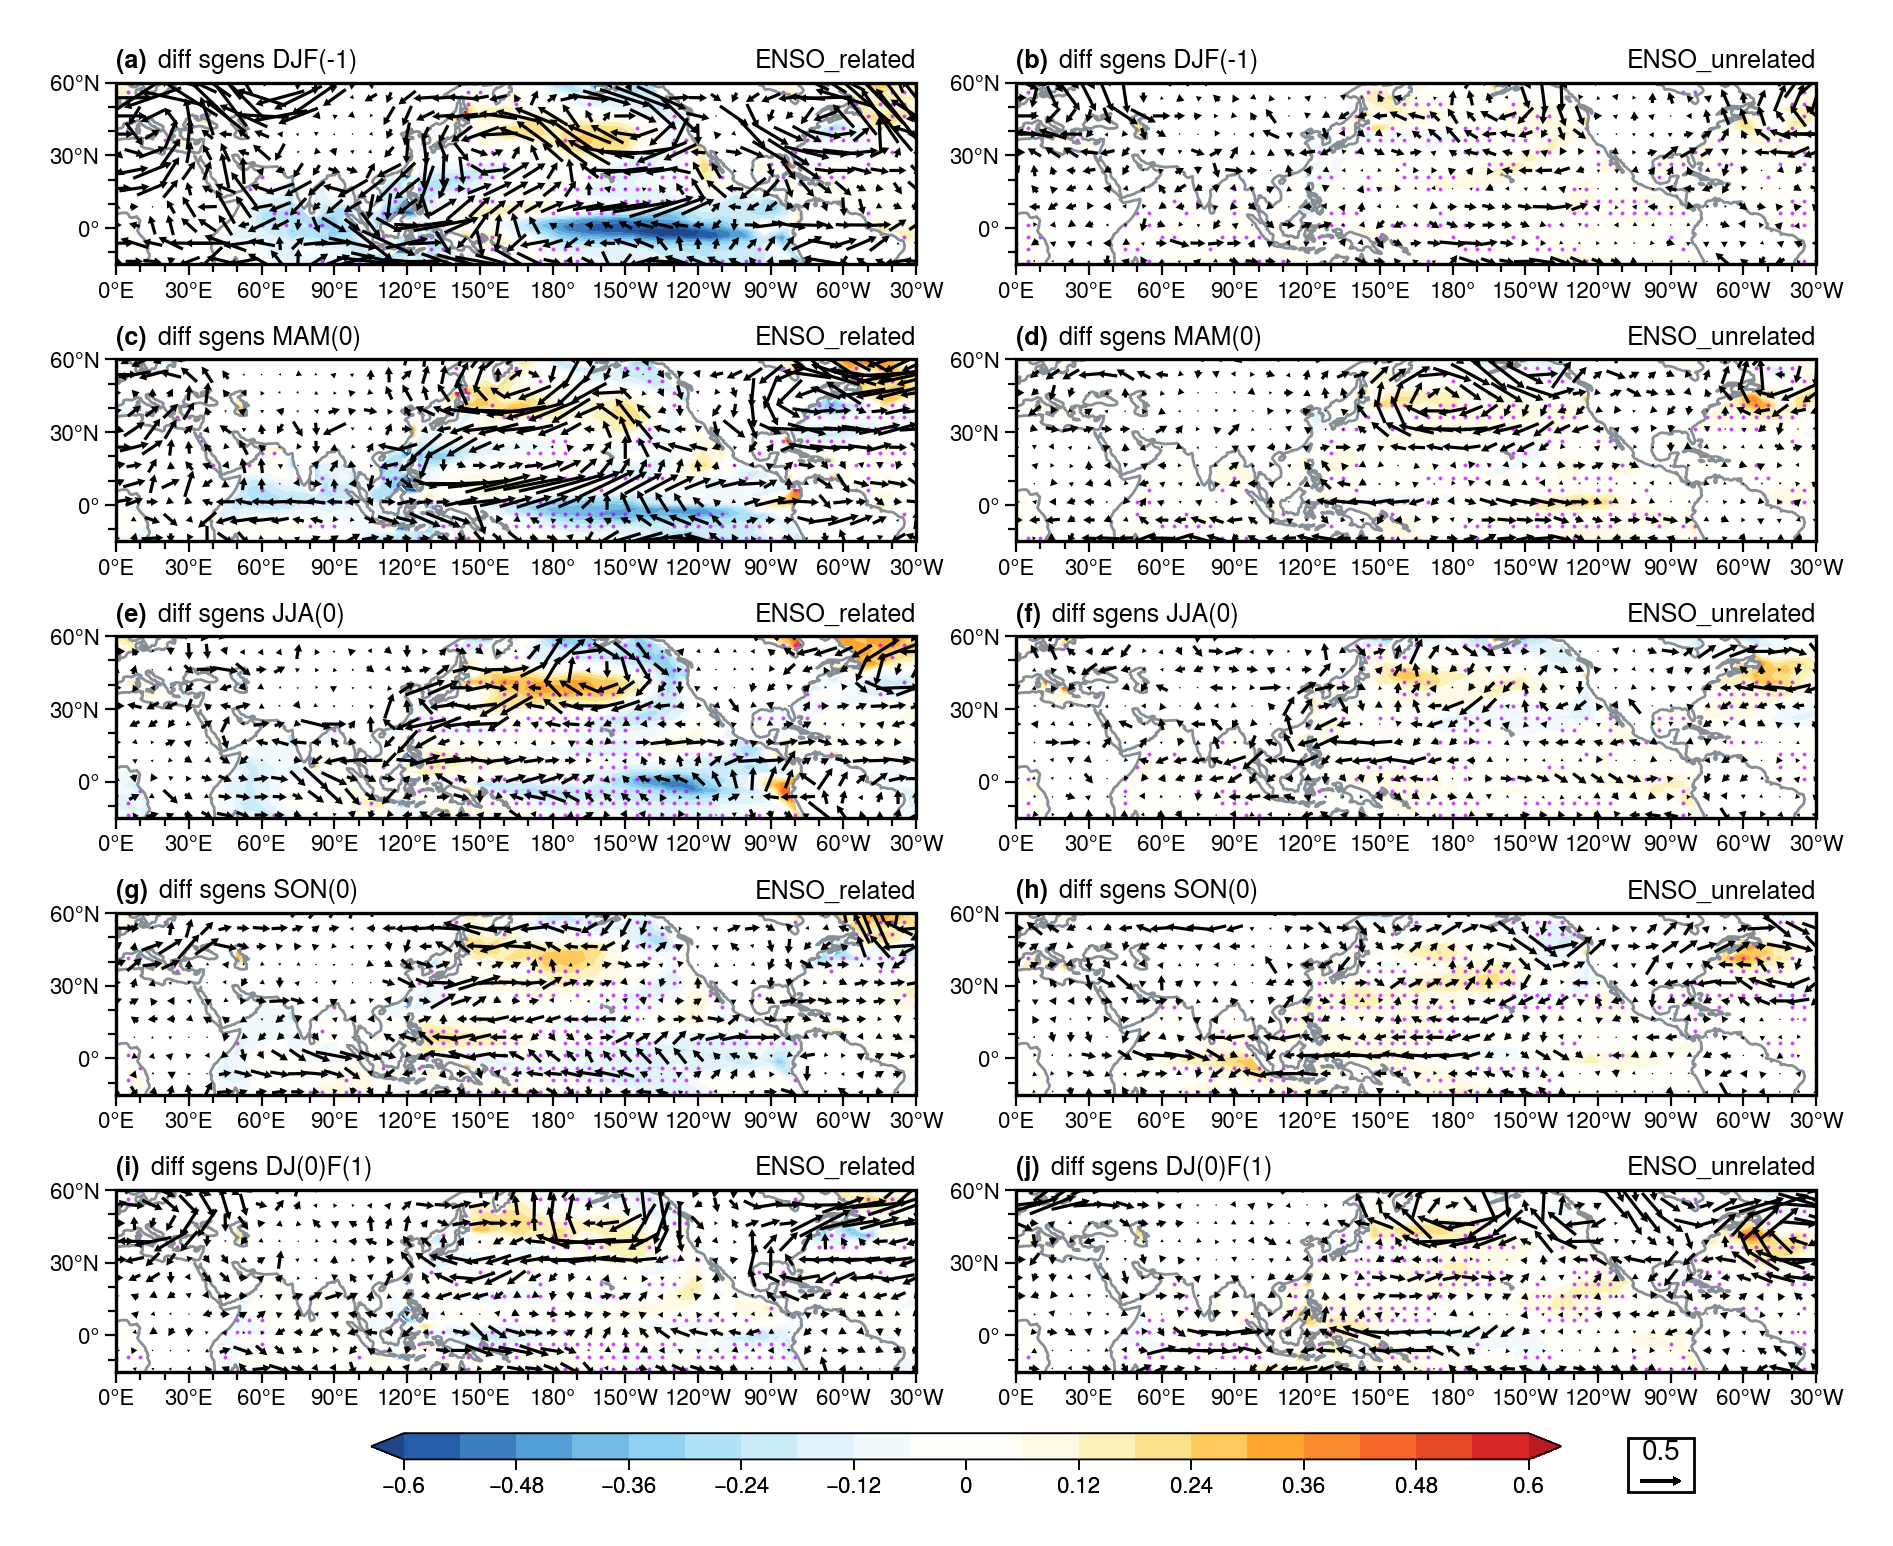

In [33]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
scalelevel=0.03
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_diff_sgens_sst_ENSO_related_unrelated = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-3:] = 0
axs = fig_diff_sgens_sst_ENSO_related_unrelated.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 3
n = 2
w, h = 0.12, 0.14
# ======================================
for iarea, area in enumerate(["ENSO_related", "ENSO_unrelated"]):
  for (iseason, season), ens_sst_slope, ens_sst_pvalue, ens_u_slope, ens_v_slope, ens_wind_mask in zip(enumerate(
      ["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sstDJF_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstMAM_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstJJA_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstSON_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        sstnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1]], 
      [sstDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstMAM_diff_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstJJA_diff_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstSON_diff_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1], 
        sstnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens_mask[iarea+1]],
      [uDJF_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        uMAM_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        uJJA_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        uSON_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        unDJF_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1]],
      [vDJF_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vMAM_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vJJA_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vSON_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1], 
        vnDJF_diff_north_south_ENSO_related_unrelated_slope_sgens[iarea+1]],
      [windDJF_diff_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windMAM_diff_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windJJA_diff_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windSON_diff_north_south_ENSO_related_unrelated_sgens_mask[iarea+1], 
        windnDJF_diff_north_south_ENSO_related_unrelated_sgens_mask[iarea+1]]):


      con = axs[iseason,iarea].contourf(
          ens_sst_slope,
          cmap="ColdHot",
          cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
          levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
          zorder=0.8,
          extend="both"
      )
      sepl.plt_sig(
          ens_sst_slope, axs[iseason,iarea], n, np.where(ens_sst_pvalue[::n, ::n] > 0.0), "bright purple", 3.0,
      )
      m = axs[iseason,iarea].quiver(
        ens_u_slope.sel(level=850.0)[::ski, ::ski],
        ens_v_slope.sel(level=850.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel,
        pivot="mid",
        color="black",
      )
      # m = axs[iseason,iarea].quiver(
      #   ens_u_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
      #   ens_v_slope.sel(level=850.0).where(ens_wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
      #   zorder=1.1,
      #   headwidth=2.6,
      #   headlength=2.3,
      #   headaxislength=2.3,
      #   minlength=0.5,
      #   width=0.004,
      #   scale_units="xy",
      #   scale=scalelevel,
      #   pivot="mid",
      #   color="black",
      # )

      axs[iseason,iarea].format(
          ltitle="diff sgens {}".format(season), rtitle="{}".format(area),
      )
      # ======================================
cb = fig_diff_sgens_sst_ENSO_related_unrelated.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cborientation = cb.ax.get_position(original=True)
cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
rectx0 = cbx+cbw+0.004
recty0 = 0.035
rectw = 0.035
recth = 0.035
rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_diff_sgens_sst_ENSO_related_unrelated.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
fig_diff_sgens_sst_ENSO_related_unrelated.add_artist(rect)
qk = plt.quiverkey(
    m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
)
fig_diff_sgens_sst_ENSO_related_unrelated.add_artist(qk)
axs.format(linewidth=1.2, titlepad=5.5)
fig_diff_sgens_sst_ENSO_related_unrelated.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()